# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [328]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [330]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [333]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [336]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [337]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [341]:
# Create an empty list
data_list = []

# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Loop through the scraped data to create a list of rows
for row in rows:
    columns_data = row.find_all('td')  # Extract all table data cells in the row
    
    # Check if there are columns in the row
    if columns_data:
        # Extract the text from each column and strip whitespace
        row_data = [col.text.strip() for col in columns_data]
        
        # Add the row data to the list
        data_list.append(row_data)

# Print the list of extracted data
print(data_list)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [343]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list, columns=columns)
df

id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [346]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [348]:
# Change data types for data analysis
df = df.astype({
    'sol': 'int',
    'min_temp': 'float',  
    'pressure': 'float',  
    'terrestrial_date': 'datetime64[ns]' 
})


In [350]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [353]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(f"Number of unique months on Mars: {unique_months}")


Number of unique months on Mars: 12


In [355]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = df['sol'].nunique()
print(f"Number of unique Martian days: {martian_days}")


Number of unique Martian days: 1867


In [357]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the data
average_min_temp_by_month_sorted = average_min_temp_by_month.sort_index(key=lambda x: x.astype(int))
average_min_temp_by_month_sorted

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

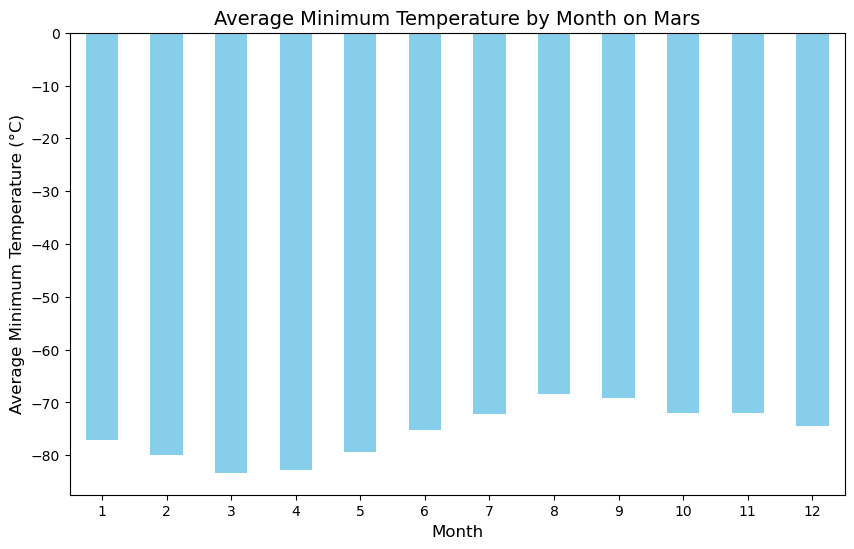

In [359]:
# Plot the average minimum temperature by month
average_min_temp_by_month_sorted.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Average Minimum Temperature by Month on Mars', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)


plt.xticks(rotation=0)
plt.show()


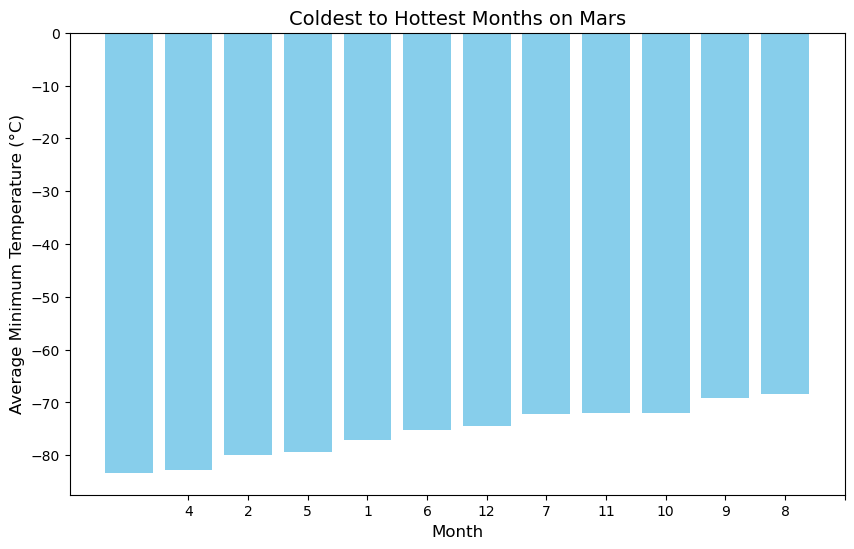

Coldest Month: 3 (Avg Min Temp: -83.30729166666667°C)
Hottest Month: 8 (Avg Min Temp: -68.38297872340425°C)


In [361]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort values in ascending order to show coldest to hottest months
average_min_temp_by_month_sorted = average_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_min_temp_by_month_sorted.index, average_min_temp_by_month_sorted, color='skyblue')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)
plt.title('Coldest to Hottest Months on Mars', fontsize=14)
plt.xticks(range(1, 13))

# Display the plot
plt.show()

# Print coldest and hottest months
coldest_month = average_min_temp_by_month_sorted.idxmin()
hottest_month = average_min_temp_by_month_sorted.idxmax()

print(f"Coldest Month: {coldest_month} (Avg Min Temp: {average_min_temp_by_month_sorted.min()}°C)")
print(f"Hottest Month: {hottest_month} (Avg Min Temp: {average_min_temp_by_month_sorted.max()}°C)")


In [363]:
# 4. What is the average pressure by month?

df['month'] = df['month'].astype(int)
average_pressure_by_month = df.groupby('month')['pressure'].mean().sort_index()
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


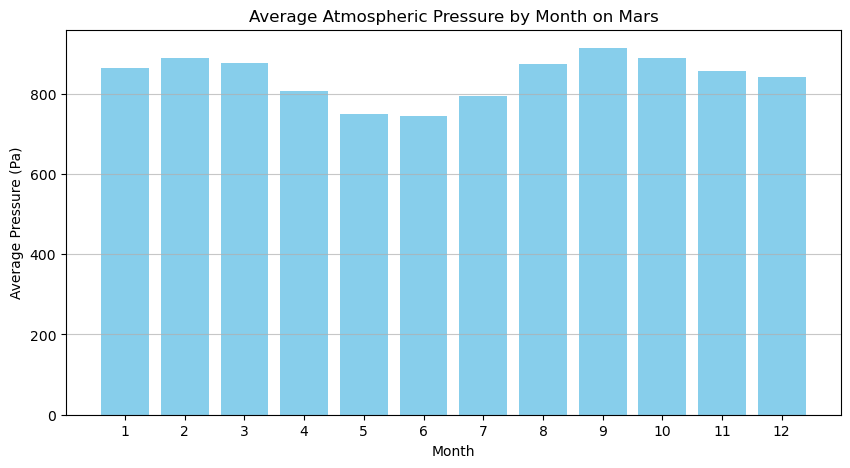

In [365]:
# Plot the average pressure by month

average_pressure_by_month = df.groupby('month')['pressure'].mean().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='skyblue')
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Month on Mars")
plt.xticks(range(1, 13))
plt.grid(axis="y",alpha=0.7)

# Show plot
plt.show()


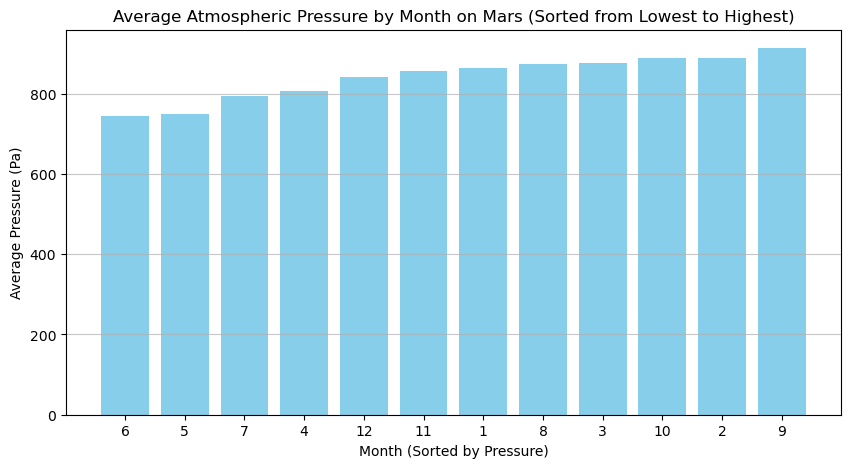

In [367]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure_by_month_sorted = average_pressure_by_month.sort_values()

plt.figure(figsize=(10, 5))
plt.bar(sorted_months, average_pressure_by_month_sorted.values, color='skyblue')
plt.xlabel("Month (Sorted by Pressure)")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Month on Mars (Sorted from Lowest to Highest)")

plt.grid(axis="y", alpha=0.7)

# Show plot
plt.show()

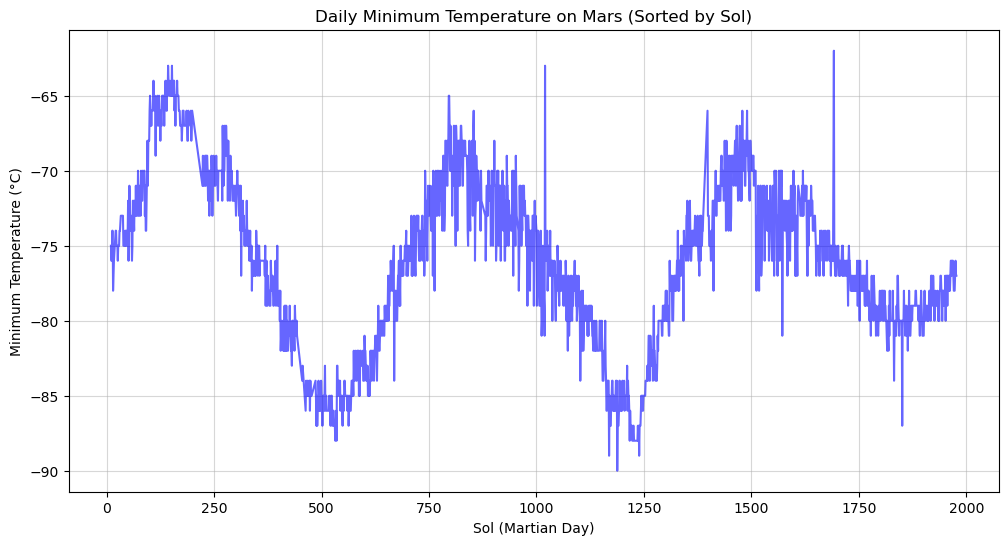

In [369]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

df_sorted = df.sort_values(by="sol")

plt.figure(figsize=(12, 6))
plt.plot(df_sorted["sol"], df_sorted["min_temp"], color='blue', alpha=0.6)
plt.xlabel("Sol (Martian Day)")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars (Sorted by Sol)")
plt.grid(alpha=0.5)

# Show plot
plt.show()


#### Minimum Temperature

The daily temperature has fluctuations over time, indicating seasonal variations on Mars. Based on the average minimum temperatures by month, March recorded the coldest temperatures at -83.31°C, while August experienced the warmest minimum temperatures at -68.38°C. 

#### Atmospheric Pressure

The atmospheric pressure on Mars varies significantly during the year, indicating seasonal changes. The data shows that September had the highest average pressure at 913.31 Pressure Atmospheric, while June recorded the lowest at 745.05 Atmospheric Pressure. Notice that the pressure remains at its lowest from May to July, suggesting a seasonal trend, and the pressure peaks around September and February.

#### Year Length

The length of a Martian year, approximately 687 Earth days, significantly influences the planet's climate and temperature patterns. The data over 2000 Sols provides valuable insights into seasonal variations, with daily minimum temperatures ranging from -65°C to -85°C. This range likely reflects the impact of Mars's longer seasons. Understanding these patterns is crucial for climate studies and planning future missions to ensure resilience against the planet's harsh and variable conditions. We can see that the temperature drops around every 500 Sols. This periodic drop is likely to happen during winter, when the hemisphere stays away from the Sun, reducing solar insolation and causing temperatures to drop significantly.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [376]:
# Write the data to a CSV
df.to_csv('mars.csv', index=False)

In [378]:
browser.quit()